In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
#Exploratory Data Analysis
loan_df = pd.read_csv('/content/drive/MyDrive/ML_LAB/A1/train.csv')
print("\nDATA\n")
print(loan_df.head())
print("\nData Shape : \n")
print(loan_df.shape)
print("\nData Information : \n")
print(loan_df.info())
print("\nData Statistics : \n")
print(loan_df.describe())


DATA

  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of Defaults Has Active C

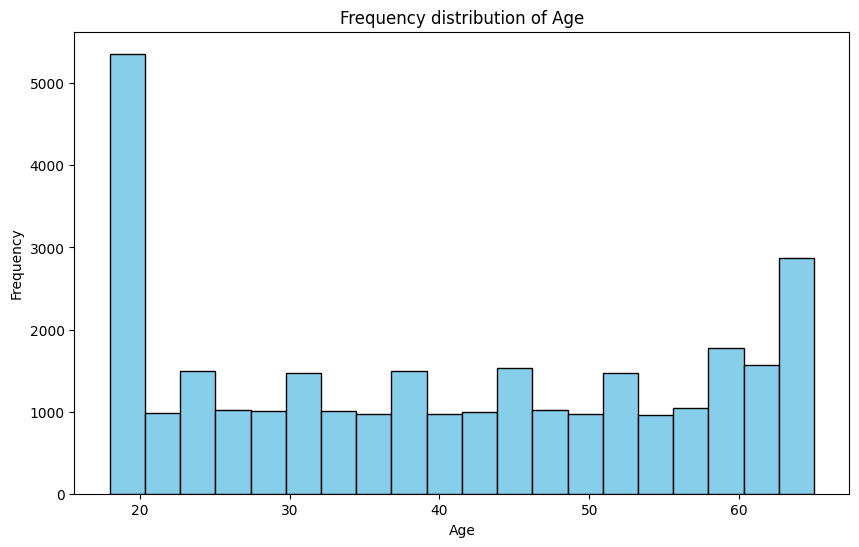

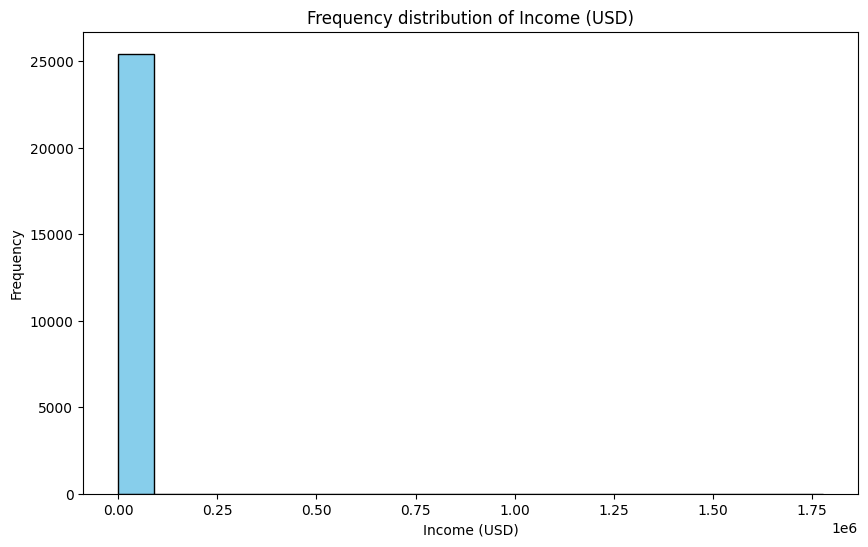

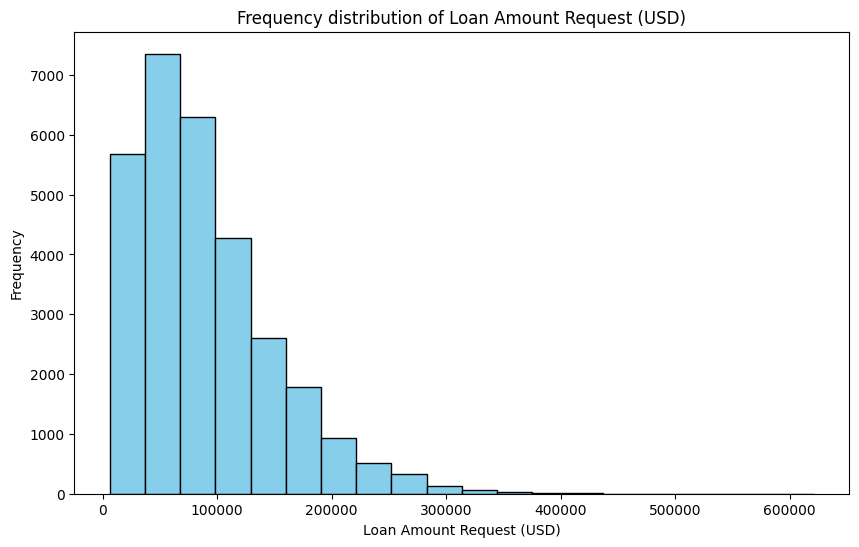

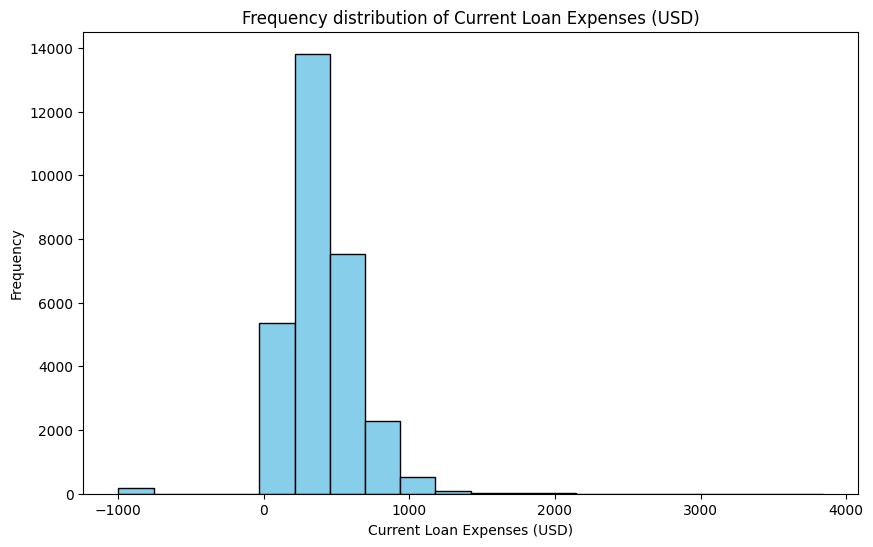

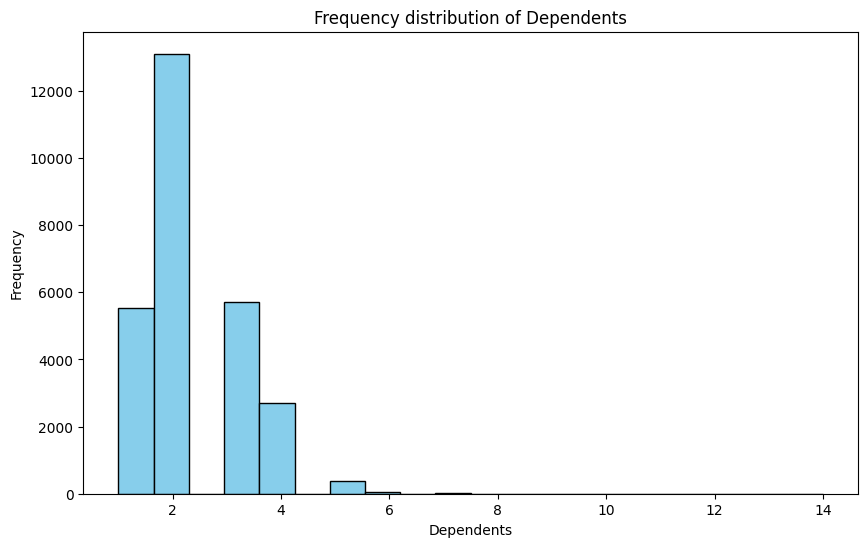

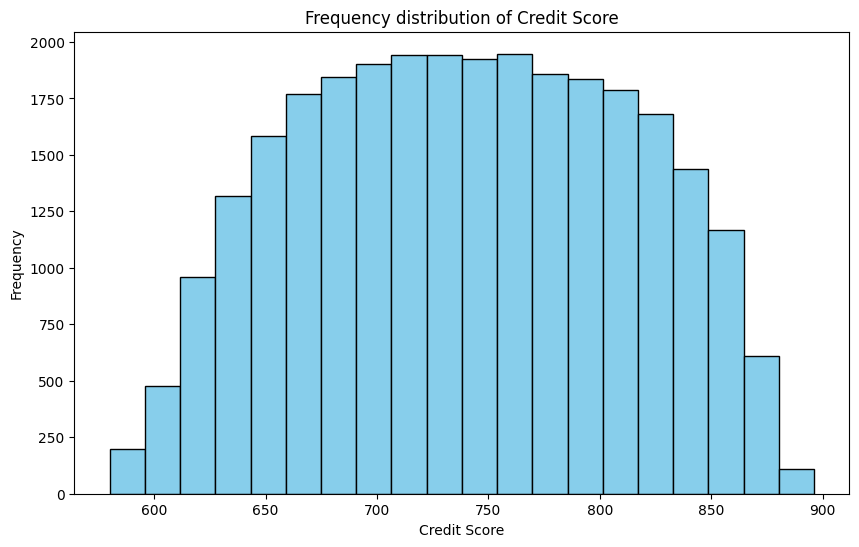

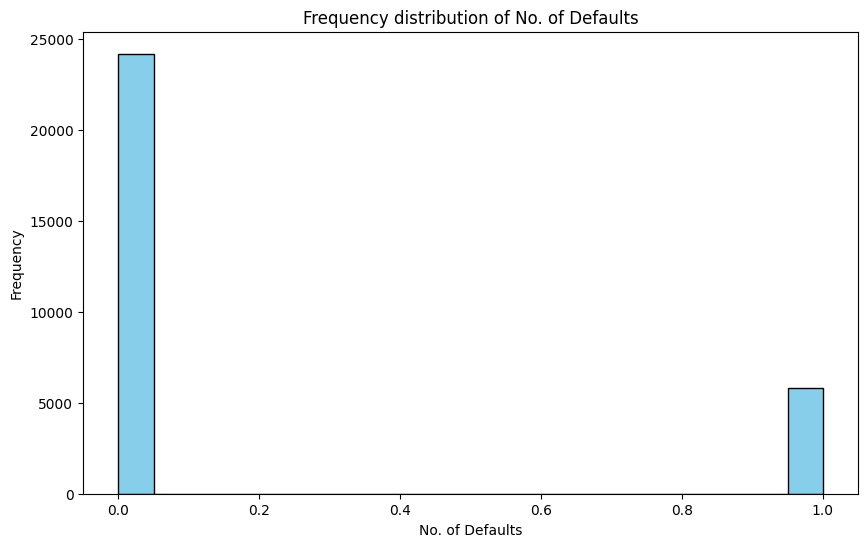

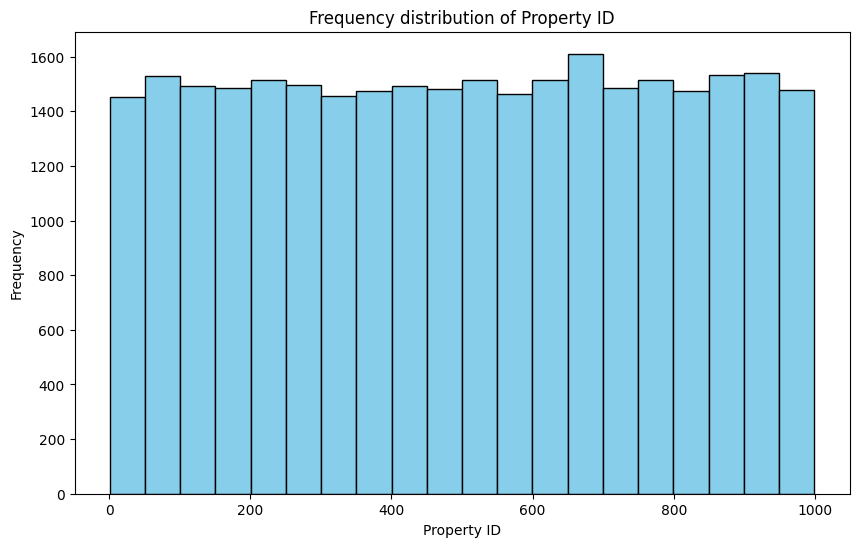

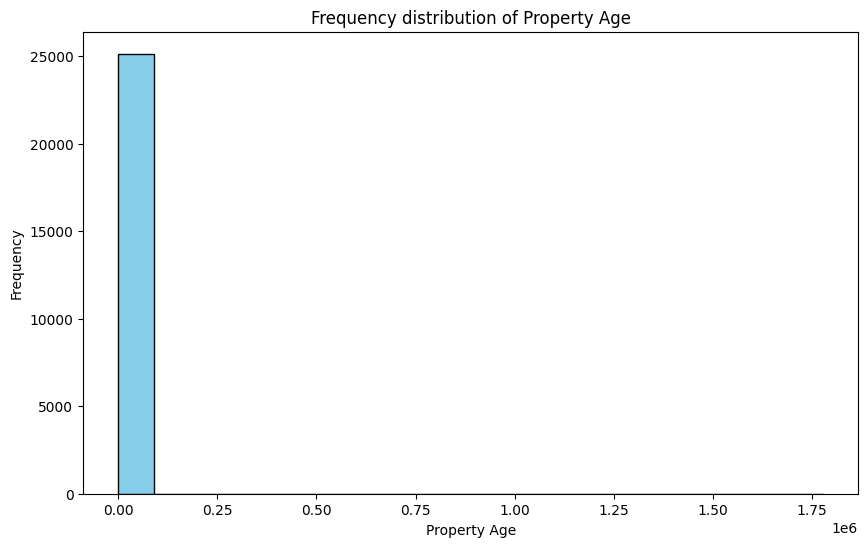

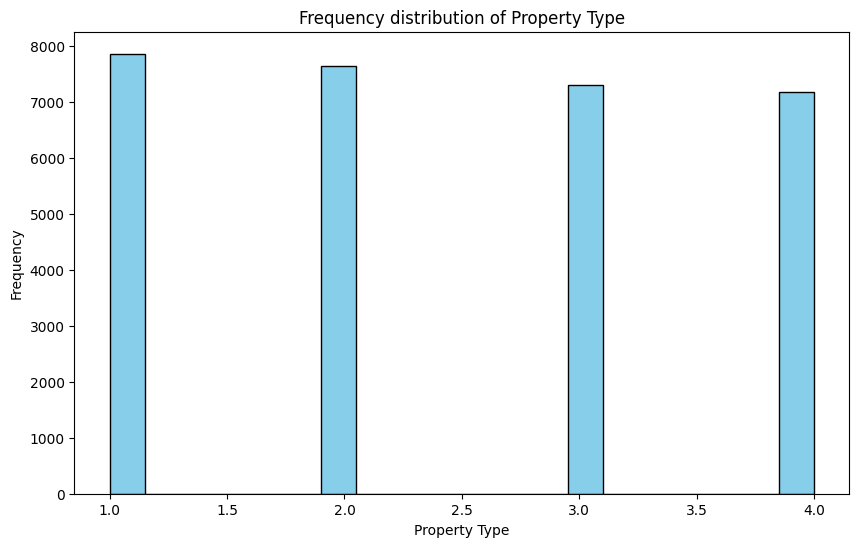

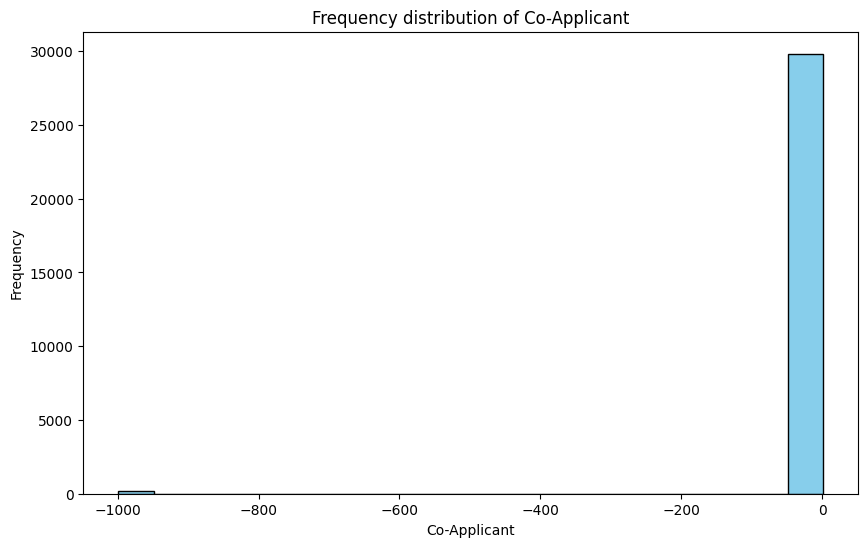

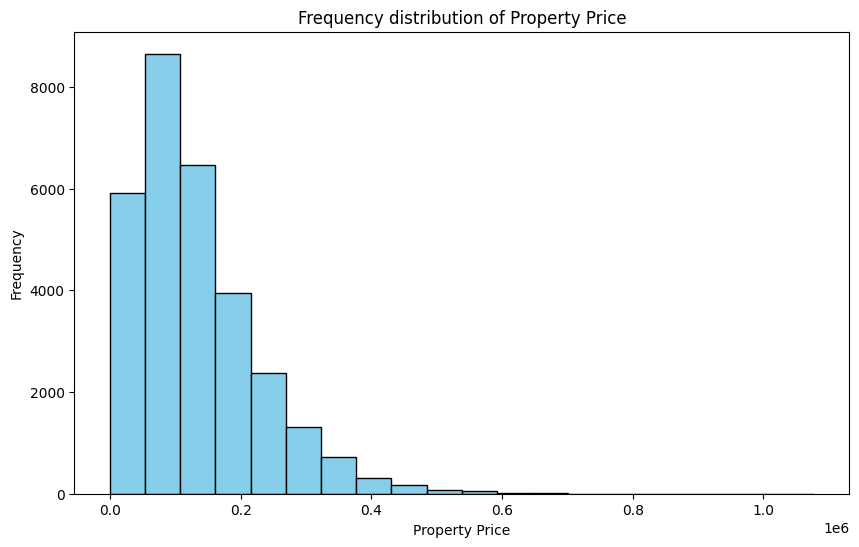

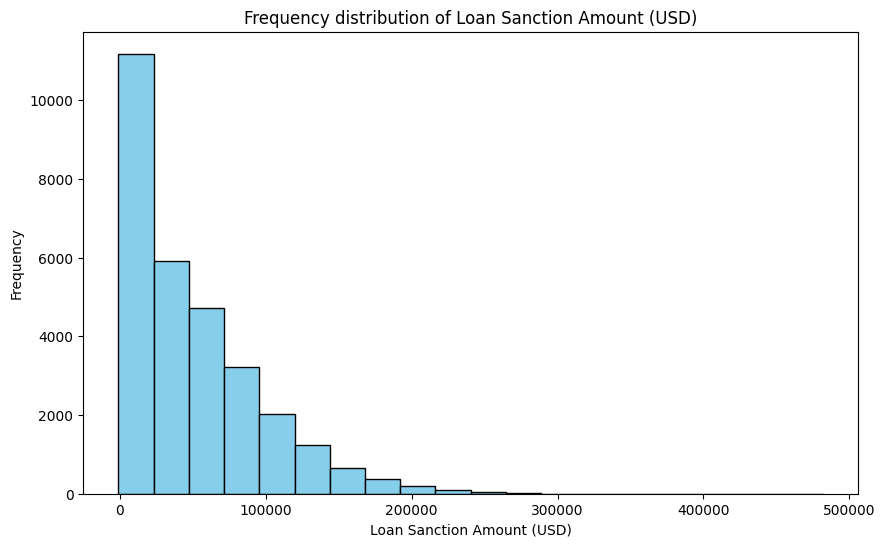

In [ ]:

# Plotting bar graphs of frequency for all numerical columns
numerical_columns = loan_df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_columns:
  plt.figure(figsize=(10, 6))
  loan_df[col].hist(bins=20, color='skyblue', edgecolor='black')
  plt.title(f'Frequency distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.grid(False)
  plt.show()

In [ ]:
#Data Preprocessing
#handling null values
print("\nNull values in each column : \n")
print(loan_df.isnull().sum())
print(loan_df.columns)
# Load the dataset
loan_df = pd.read_csv('/content/drive/MyDrive/ML_LAB/A1/train.csv')
# Select numerical columns for modeling
numerical_columns = loan_df[['Age', 'Income (USD)', 'Loan Amount Request (USD)','Current Loan Expenses (USD)', 'Dependents', 'Credit Score','No. of Defaults', 'Property ID', 'Property Age', 'Property Type','Co-Applicant', 'Property Price', 'Loan Sanction Amount (USD)']]


Null values in each column : 

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64
Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', '

In [ ]:
# Handle missing values by filling with median
for col in numerical_columns.columns:
  loan_df.loc[:, col] = loan_df[col].fillna(loan_df[col].median())
  # Perform feature engineering

In [ ]:
  # Perform feature engineering
  loan_df['Income_Loan_Ratio'] = loan_df['Income (USD)'] / loan_df['Loan Amount Request (USD)']

In [ ]:
# Handle outliers using z-score

from scipy.stats import zscore
z_scores = np.abs(zscore(loan_df[numerical_columns.columns]))
outlier_threshold = 3
loan_df_cleaned = loan_df[(z_scores < outlier_threshold).all(axis=1)]

In [ ]:
# Split data into training and test sets

X = loan_df_cleaned[numerical_columns.columns[:-1]].values
y = loan_df_cleaned[numerical_columns.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Perform hyperparameter tuning for Ridge regression
param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5,
scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

In [ ]:

# Train the Ridge regression model with the best hyperparameters
ridge_model_best = Ridge(alpha=best_params['alpha'])
ridge_model_best.fit(X_train_scaled, y_train)

Ridge(alpha=10)

Test Data Metrics:
Mean Squared Error (MSE): 732967240.3077016
Root Mean Squared Error (RMSE): 27073.367731180057
Mean Absolute Error (MAE): 18757.091875447997
R-squared (Coefficient of Determination): 0.5981887580803897

Results applying User Defined linear regression on data processed:



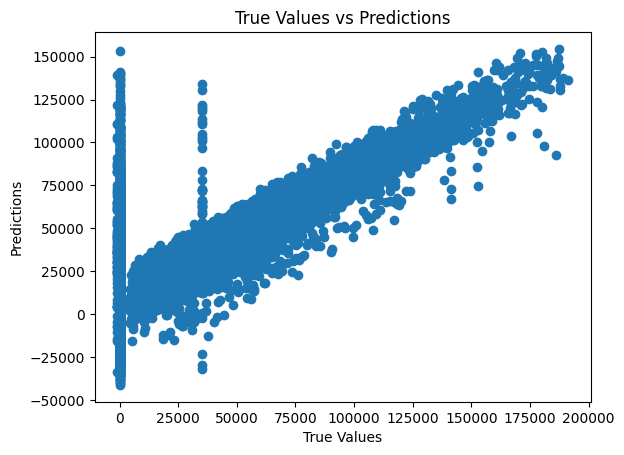

In [ ]:
# Make predictions on the test set
y_pred_test = ridge_model_best.predict(X_test_scaled)

# Evaluate the model performance
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r_squared_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Test Data Metrics:")

print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (Coefficient of Determination):", r_squared_test)
print("\nResults applying User Defined linear regression on data processed:\n")
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()